In [3]:
import pandas as pd

#regex
import re

#NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#TextBlob
from textblob import TextBlob

#SpaCy
import spacy
from spacy import displacy

from langdetect import detect

#Others
#import speech_recognition as sr #sudo pip3 install --upgrade speechrecognition
#import pyaudio

In [4]:
df = pd.read_csv("../desktop/lotr_scripts.csv", encoding="latin1")
df.head(15)

,Unnamed: 0,char,dialog,movie
0,0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in! Â",The Return of the King
2,2,DEAGOL,Arrghh!,The Return of the King
3,3,SMEAGOL,Deagol! Â,The Return of the King
4,4,SMEAGOL,Deagol! Â,The Return of the King
5,5,SMEAGOL,Deagol! Â,The Return of the King
6,6,SMEAGOL,Give us that! Deagol my love Â,The Return of the King
7,7,DEAGOL,Why? Â,The Return of the King
8,8,SMEAGOL,"Because' , it's my birthday and I wants it. Â",The Return of the King
9,9,SMEAGOL,Â My precious. Â,The Return of the King


In [5]:
df.movie.unique()

array(['The Return of the King ', 'The Two Towers ',
       'The Fellowship of the Ring '], dtype=object)

In [3]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","Å"]
for char in spec_chars:
    df['dialog'] = df['dialog'].str.replace(char, ' ')

<ipython-input-3-c70bfdf753ef>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['dialog'] = df['dialog'].str.replace(char, ' ')


# Tokenization


In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santiagohartmann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(df.iloc[0]['dialog'])
tokens

['Oh',
 'Smeagol',
 'Ive',
 'got',
 'one',
 'Ive',
 'got',
 'a',
 'fish',
 'Smeagol',
 'Smeagol']

In [6]:
def tokenize (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [7]:
df['dialog']=df['dialog'].apply(str)

In [8]:
df['dialog'] = df['dialog'].apply(tokenize)
df.head()


,Unnamed: 0,char,dialog,movie
0,0,DEAGOL,"[Oh, Smeagol, Ive, got, one, Ive, got, a, fish...",The Return of the King
1,1,SMEAGOL,"[Pull, it, in, Go, on, go, on, go, on, pull, i...",The Return of the King
2,2,DEAGOL,[Arrghh],The Return of the King
3,3,SMEAGOL,"[Deagol, Â]",The Return of the King
4,4,SMEAGOL,"[Deagol, Â]",The Return of the King


In [12]:
df['dialog'] = df['dialog'].apply(lambda x: " ".join(x))
df.head()

,Unnamed: 0,char,dialog,movie
0,0,DEAGOL,Oh Smeagol Ive got one Ive got a fish Smeagol ...,The Return of the King
1,1,SMEAGOL,Pull it in Go on go on go on pull it in Â,The Return of the King
2,2,DEAGOL,Arrghh,The Return of the King
3,3,SMEAGOL,Deagol Â,The Return of the King
4,4,SMEAGOL,Deagol Â,The Return of the King


# Stopwords

In [13]:
nltk.download('stopwords') #stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santiagohartmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'further', 'under', 'their', 'same', 'is', 'there', 'ourselves', 'shan', 'will', 'because', 'again', "you'll", 'up', 'too', 've', 'me', "should've", "you've", 'its', 'do', 'so', 'this', 'they', 'doing', 'ain', 'such', "wouldn't", 'it', 'no', 'off', 'by', 'over', "doesn't", 'above', 'what', 'y', 'his', 'ma', 'ours', 'that', 'down', "it's", 'won', 'wouldn', 'we', 'them', 'against', 'and', 'needn', 'o', 'yourself', 'can', 'should', 'was', 'don', 'd', 'himself', "mustn't", "shouldn't", 'the', "don't", 're', 'a', "hadn't", 'did', 'why', 'shouldn', 'yours', 'other', 'own', "you'd", 'those', "you're", "hasn't", 'few', 'you', 'isn', 'in', "won't", 'myself', 'into', "she's", "mightn't", 'if', 'hers', "that'll", 'were', 'while', 'being', 'each', 'all', 's', 'he', 'mustn', 'haven', 'where', 'has', 'just', 'aren', 'on', 'here', 'couldn', "needn't", 'which', 'i', 'only', 'from', 'as', 'having', 'through', 'she', 'about', "weren't", 'does', 'of', 'or', 'didn', 'not', 'theirs', 'between', 'be', 'unt

In [15]:
df.dialog = df.dialog.apply(lambda x: x.split(" "))


In [17]:
def stop_words (lista):
    stop_words = set(stopwords.words('english'))
    nueva_lista = []
    for string in lista:
        if string not in stop_words:
            nueva_lista.append(string)
    return " ".join(nueva_lista)


In [18]:
df.dialog = df.dialog.apply(stop_words)
df.head()

,Unnamed: 0,char,dialog,movie
0,0,DEAGOL,Oh Smeagol Ive got one Ive got fish Smeagol Sm...,The Return of the King
1,1,SMEAGOL,Pull Go go go pull Â,The Return of the King
2,2,DEAGOL,Arrghh,The Return of the King
3,3,SMEAGOL,Deagol Â,The Return of the King
4,4,SMEAGOL,Deagol Â,The Return of the King


# Sentiment Analysis

In [19]:
the_string = "i hate it here"

In [20]:
blob = TextBlob(the_string)
blob.sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/santiagohartmann/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
sia = SentimentIntensityAnalyzer()


In [23]:
test = "this is beautiful"


In [24]:
polarity = sia.polarity_scores(test)


In [25]:
polarity

{'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}

In [26]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [27]:
sentimentAnalysis(test)
   

0.5994

In [29]:
df['dialog']=df['dialog'].apply(str)

In [34]:
df['sentiment_compound'] = df.dialog.apply(sentimentAnalysis)
df.head()

,Unnamed: 0,char,dialog,movie,sentiment_compound
0,0,DEAGOL,Oh Smeagol Ive got one Ive got fish Smeagol Sm...,The Return of the King,0.0
1,1,SMEAGOL,Pull Go go go pull Â,The Return of the King,0.0
2,2,DEAGOL,Arrghh,The Return of the King,0.0
3,3,SMEAGOL,Deagol Â,The Return of the King,0.0
4,4,SMEAGOL,Deagol Â,The Return of the King,0.0


In [31]:
df.char.value_counts()

FRODO                  225
SAM                    216
GANDALF                204
ARAGORN                185
PIPPIN                 163
                      ... 
SHARKU                   1
GALADRIEL VOICEOVER      1
OLD MAN                  1
(GOLLUM                  1
FRODO                    1
Name: char, Length: 118, dtype: int64

In [32]:
resumen = df.groupby(['char'])['sentiment_compound'].mean().sort_values()
resumen

char
GAN DALF              -0.840200
URUK-HAI              -0.735100
(GOLLUM               -0.680800
FARMER MAGGOT         -0.659700
SHARKU                -0.648600
                         ...   
Â GANDALF              0.381800
EOTHAIN                0.401900
HOBBIT                 0.427167
GALADRIEL VOICEOVER    0.510600
LADY                   0.659700
Name: sentiment_compound, Length: 118, dtype: float64

<AxesSubplot:xlabel='char'>

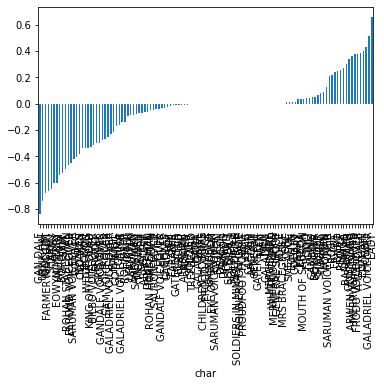

In [35]:
resumen.plot(kind="bar")